In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.stats import boxcox_normmax,boxcox

from subprocess import check_output
from sklearn.externals import joblib

In [2]:
train = pd.read_csv('dataset/train_data.csv')
test = pd.read_csv('dataset/test_data.csv')

FileNotFoundError: [Errno 2] File b'dataset/train_data.csv' does not exist: b'dataset/train_data.csv'

In [3]:
train['unit_price'] = train['total_price']/train['building_area']

In [4]:
##display the first five rows of the train dataset.
train.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,unit_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,nan,...,1,157,1,2483,1,6011,1,34.470,647603.770,189458.909
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,nan,...,1,115,1,15872,1,32221,1,40.074,3321452.000,821875.329
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,nan,...,1,212,1,15760,1,32228,1,54.462,9570885.316,1713898.172
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,nan,...,1,125,1,2568,1,7271,1,99.629,14215011.127,1048070.408
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,nan,...,1,47,1,2587,1,7442,1,124.131,762711.976,162690.772


In [5]:
##display the first five rows of the test dataset.
test.head(5)

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,nan,...,7,21,1,129,1,3991,1,8409,1,105.462
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,nan,...,18,44,1,67,1,1950,1,10725,1,100.820
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,nan,...,0,3,1,35,1,3707,1,19459,1,259.801
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,nan,...,16,60,1,144,1,6487,1,29400,1,22.942
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,nan,...,4,18,1,76,1,1346,1,3280,1,181.213


In [6]:
train = train.drop(6508)

In [7]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['building_id']
test_ID = test['building_id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("building_id", axis = 1, inplace = True)
test.drop("building_id", axis = 1, inplace = True)
# train.drop("village_income_median", axis = 1, inplace = True)
# test.drop("village_income_median", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size before dropping Id feature is : (59999, 236) 
The test data size before dropping Id feature is : (10000, 234) 

The train data size after dropping Id feature is : (59999, 235) 
The test data size after dropping Id feature is : (10000, 233) 


In [8]:
lable_id = 'unit_price'

因為後來發現資料很重要，以下去極值的部分，後來皆沒有執行

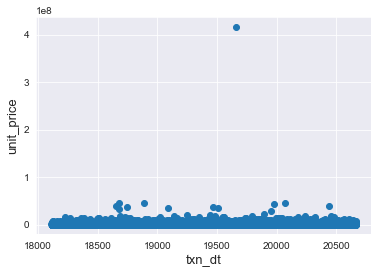

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['txn_dt'], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel('txn_dt', fontsize=13)
plt.show()


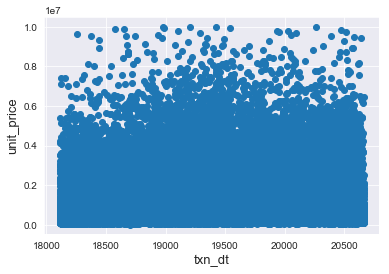

In [10]:
train = train.drop(train[(train[lable_id ]>10000000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train['txn_dt'], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel('txn_dt', fontsize=13)
plt.show()

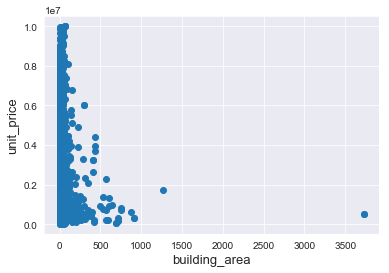

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['building_area'], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel('building_area', fontsize=13)
plt.show()


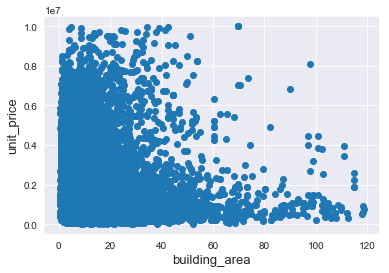

In [12]:
train = train.drop(train[(train['building_area']>120)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train['building_area'], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel('building_area', fontsize=13)
plt.show()

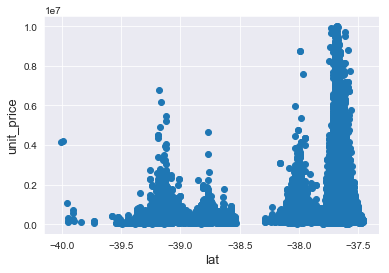

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['lat'], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel('lat', fontsize=13)
plt.show()

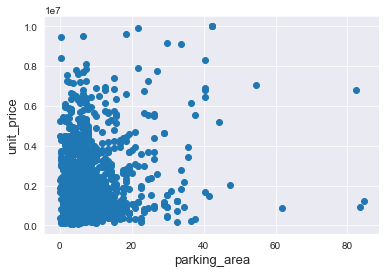

In [14]:
label = 'parking_area'
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

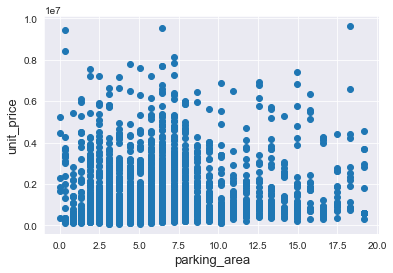

In [15]:
label = 'parking_area'
train = train.drop(train[(train[label]>20)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

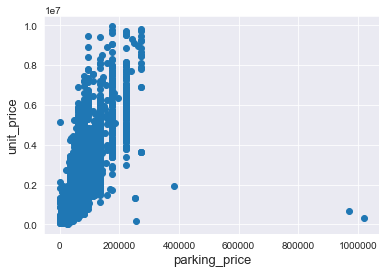

In [16]:
label = 'parking_price'
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

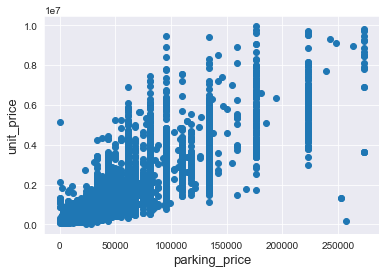

In [17]:
label = 'parking_price'
train = train.drop(train[(train[label]>300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

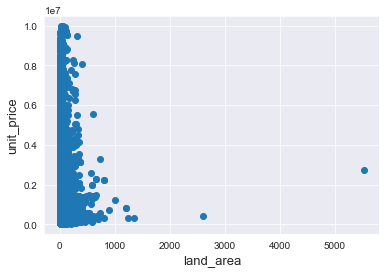

In [18]:
label = 'land_area'
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

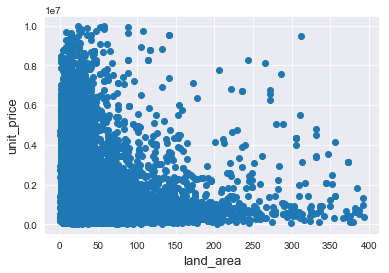

In [19]:
label = 'land_area'
train = train.drop(train[(train[label]>400)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

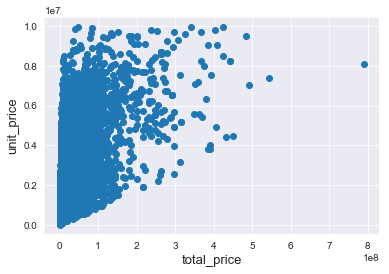

In [20]:
label = 'total_price'
fig, ax = plt.subplots()
ax.scatter(x = train[label], y = train[lable_id ])
plt.ylabel(lable_id , fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

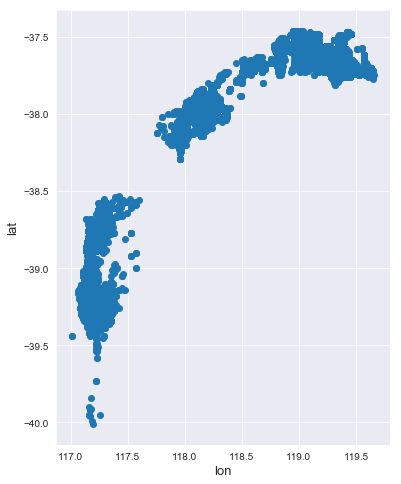

In [21]:
label = 'lon'

fig, ax = plt.subplots(figsize=(6,8))
ax.scatter(x = train[label], y = train['lat'])
plt.ylabel('lat', fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

將city 用顏色區分，畫出來類似台灣各縣市

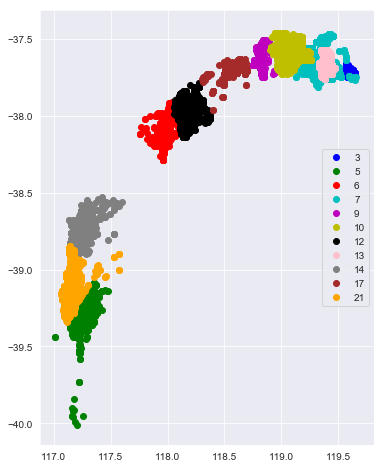

In [9]:
label = 'lon'

fig, ax = plt.subplots(figsize=(6,8))
scatter_x = np.array(train[label])
scatter_y = np.array(train['lat'])
group = train['city']
cdict = {3: 'b', 5: 'g', 6: 'r',7:'c',9:'m',10:'y',12:'k',13:'pink',14:'gray',17:'brown',21:'orange'}

for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i],c = cdict[g], label=g)
ax.legend(loc='center right')
plt.show()

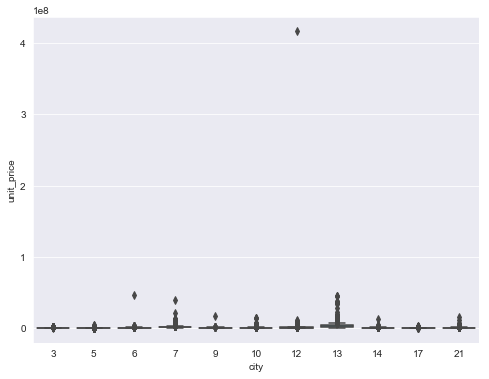

In [10]:
var = 'city'  
data = pd.concat([train[lable_id ], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=lable_id , data=data)  # 横坐标类别，纵坐标目标变量
fig.axis();

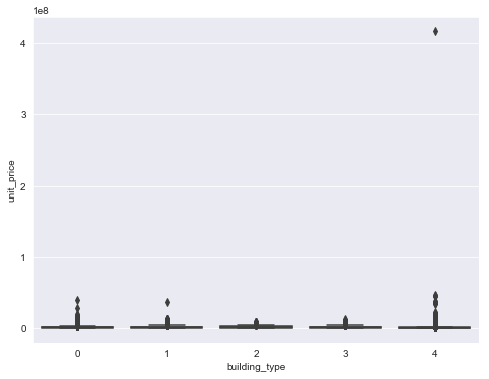

In [11]:
var = 'building_type'  
data = pd.concat([train[lable_id ], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=lable_id , data=data)  # 横坐标类别，纵坐标目标变量
fig.axis();

In [12]:
# train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# #Check the graphic again
# fig, ax = plt.subplots()
# ax.scatter(train['GrLivArea'], train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

C:\Users\hohah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 1191244.00 and sigma = 2211454.27



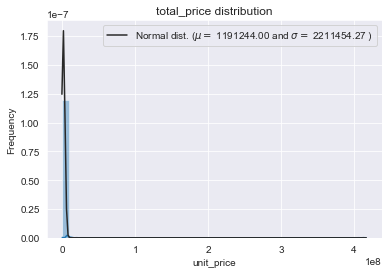

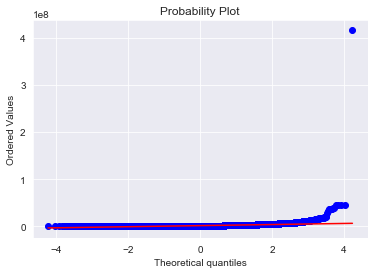

In [13]:
sns.distplot(train[lable_id ] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train[lable_id ])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train[lable_id ], plot=plt)
plt.show()

C:\Users\hohah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 1191244.00 and sigma = 2211454.27



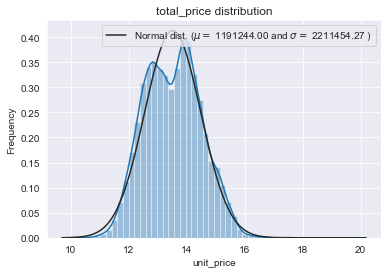

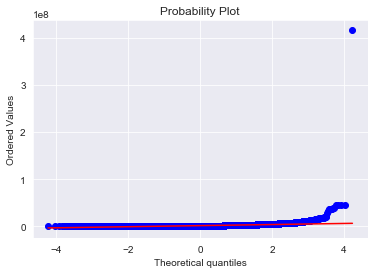

In [14]:
sns.distplot(np.log1p(train[lable_id ]) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train[lable_id ])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train[lable_id ], plot=plt)
plt.show()

In [15]:
p_value=1000000000
p_i = 0
for i in range(-200,200,1):
    bx = boxcox1p(train[lable_id],i/100)
#     print(stats.jarque_bera(bx))
    if stats.jarque_bera(bx)[0]<p_value:
        p_value = stats.jarque_bera(bx)[0]
        p_i = i
print(p_value)
print(p_i)
print(stats.jarque_bera(boxcox1p(train[lable_id],p_i/100)))


631.8907220987206
-3
(631.8907220987206, 0.0)



 mu = 13.52 and sigma = 0.97



C:\Users\hohah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


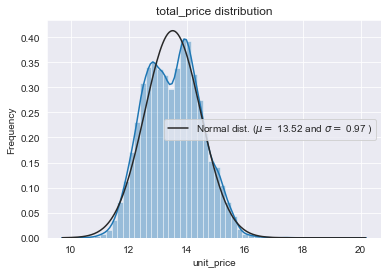

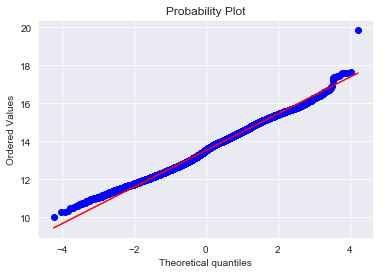

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train[lable_id ] = np.log1p(train[lable_id ])

#Check the new distribution 
sns.distplot(train[lable_id ] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train[lable_id ])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train[lable_id ], plot=plt)
plt.show()

In [17]:
print (train['total_price'].skew())
train['total_price'].kurt()

40.18367201949308


2592.9240482846344

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.unit_price.values
y_price = train.total_price.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['total_price'], axis=1, inplace=True)
all_data.drop(['unit_price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (69999, 233)


In [19]:
# 新增是否為頂樓
all_data['top_floor'] = np.where((all_data['total_floor'] == all_data['txn_floor']) , 1, 0)

In [20]:
# Adding total sqfootage feature 
all_data['house_day'] = all_data['txn_dt'] - all_data['building_complete_dt'] 

#txn_dt - building_complete_dt # 幾年的房子

In [21]:
# 新增new_town
all_data['new_town'] = all_data['city'].apply(str) + '_' + all_data['town'].apply(str)

In [22]:
all_data = all_data.drop(columns=['town'])

In [23]:
# all_data['area1'] = all_data['building_area'] + all_data['land_area'] 
# all_data['area0.5'] = all_data['building_area'] + 0.5*all_data['land_area'] 
# all_data['area0.8'] = all_data['building_area'] + 0.8*all_data['land_area'] 
# all_data['area1.5'] = all_data['building_area'] + 1.5*all_data['land_area'] 
# all_data['area11.2'] = all_data['building_area'] + 1.2*all_data['land_area'] 

In [24]:
category_col = ['building_material','city','total_floor','building_type','building_use','parking_way','txn_floor','top_floor']

In [25]:
for i in category_col:
    all_data[i] = all_data[i].apply(str)

In [26]:
all_data.columns
matching = [s for s in train.columns if "index" in s]

In [27]:
len(matching)

70

In [28]:
for i in matching:
    all_data[i] = all_data[i].apply(str)

In [29]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
parking_area,94.853
parking_price,76.821


Text(0.5,1,'Percent missing data by feature')

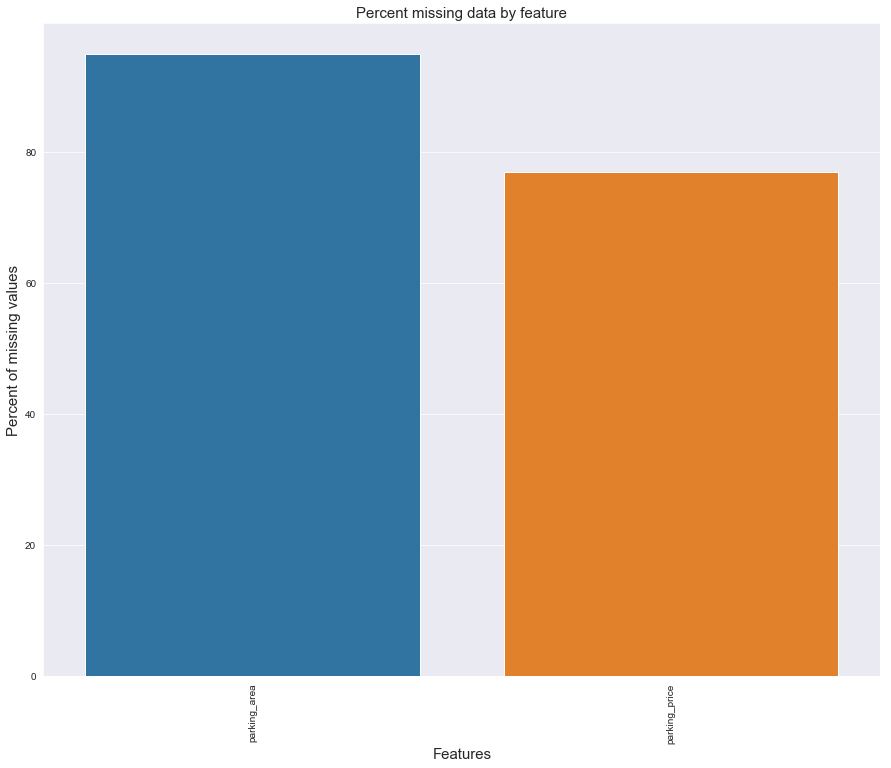

In [30]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [31]:
#Correlation map to see how features are correlated with SalePrice
# corrmat = train.corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

In [32]:
# corrmat = train.corr().abs()

In [33]:
# k = 70   #number of variables for heatmap，热力图变量数量 

# # nlargest - 根据SalePrice列排序，返回前10个跟SalePrice相关性最高的行
# cols = corrmat.nlargest(k, 'total_price')['total_price'].index 

# # cm = corrmat.loc[cols,cols] 同以下cm赋值相同
# # 训练集中取出目标列的样本，转置，计算10个特征之间的相关性
# cm = np.corrcoef(train[cols].values.T)
# sns.set(font_scale=1.25)
# plt.subplots(figsize=(16,12))
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [34]:
all_data.shape

(69999, 235)

In [35]:
all_data["parking_area"] = all_data["parking_area"].fillna(0)

In [36]:
all_data["parking_price"] = all_data["parking_price"].fillna(0)

In [37]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [38]:
# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (69999, 235)


In [39]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
parking_area,151.992
building_area,82.105
land_area,42.577
VI_10,28.645
XIII_10,27.478
XIII_50,18.478
IV_10,17.640
X_10,17.427
XIII_100,16.426
I_10,15.265


In [40]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(69999, 594)


In [41]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [42]:
print(train.shape)
print(test.shape)

(59999, 594)
(10000, 594)


In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVR

In [44]:
X_train, X_valid, train_y, valid_y = train_test_split( train, y_train, test_size=0.1, random_state=49)#42

In [45]:
print(X_train.shape)
print(train_y.shape)
print(X_valid.shape)
print(valid_y.shape)

(53999, 594)
(53999,)
(6000, 594)
(6000,)


In [46]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [47]:
def MAPE(y, y_pred):
    return sum(abs(y_pred-y)/y)/len(y)

In [48]:
def Score(y, y_pred):
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
    hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
    MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return hit_rate+MAPE

In [49]:
def Score_MAPE(y, y_pred):
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
#     hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
    MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return MAPE

In [50]:
def Score_type(y, y_pred, h_type):
    y = np.expm1(y)
    y_pred = np.where(h_type>0,np.expm1(y_pred),0)
    hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
    MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return hit_rate+MAPE

In [51]:
def Score_acc(y, y_pred, h_type):
    y = np.expm1(y)
    y_pred = np.where(h_type>0,np.expm1(y_pred),0)
    type_total = sum(np.where(h_type>0,1,0))
    hit_rate = np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/type_total
#     MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    return hit_rate#+MAPE

In [52]:
def Score2(y, y_pred):
    y=np.expm1(y)
    y_pred=np.expm1(y_pred)
#     hit_rate = np.around(np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y),decimals=4)*10000
#     MAPE = 1-np.sum(abs((y_pred-y)/y))/len(y)
    hit_rate = np.sum(np.where(abs((y_pred-y)/y)<.1,1,0))/len(y)
    MAPE = np.around(1-np.sum(abs((y_pred-y)/y))/len(y),decimals=4)*10000
    return hit_rate+MAPE

In [53]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [54]:
valid=[(X_valid, valid_y)]

以下為自動調參的部分

In [55]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials , partial

In [56]:
def check_result(search_result,param_space_list_2,n,plot_val=True,plot_tid=True,output_best = True):
    search_result.sort(key=lambda x : x["result"]["loss"]) # sort by search result
    
    for k in range(n):
        print("\nTop"+str(k+1)+" result :")
        print("val : ",search_result[k]["result"]["loss"])
        for i,j in search_result[k]["misc"]["vals"].items():
            print(i,param_space_list_2[i][j[0]])
    
    if plot_tid:
        print("\n")
        for i,j in param_space_list_2.items():
            if type(j) == type([]):
#                 print(i,j)
                f, ax = plt.subplots(1)
                xs = [param_space_list_2[i][t['misc']['vals'][i][0]] for t in search_result] 
                ys = [t["tid"] for t in search_result]
                ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
                ax.set_title('$t$ $vs$ '+i, fontsize=18)
                ax.set_xlabel(i, fontsize=16)
                ax.set_ylabel('$t$', fontsize=16)
                
    if plot_val:
        print("\n")
        for i,j in param_space_list_2.items():
            if type(j) == type([]):
                print(i,j)
                f, ax = plt.subplots(1)
                xs = [param_space_list_2[i][t['misc']['vals'][i][0]] for t in search_result] 
                ys = [t['result']['loss'] for t in search_result]
                ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
                ax.set_title('$val$ $vs$ '+i, fontsize=18)
                ax.set_xlabel(i, fontsize=16)
                ax.set_ylabel('$val$', fontsize=16)
    if output_best:
        best_result_param = param_space_list_2.copy()
        for i,j in search_result[0]["misc"]["vals"].items():
            best_result_param[i] = param_space_list_2[i][j[0]]
        return best_result_param

In [57]:
param_space_list = {
"boosting_type" : 'gbdt',
"objective" : 'regression',
"metric" : 'mape',
"learning_rate" : 0.01, 
"n_estimators" : 30000,
"num_leaves" : [250,300,350,375,400,425,450,500,550], 
"max_depth" : [-1], #[-1,4,5,6,7,8], 
"max_bin" : [ 250, 255, 300, 350,375, 400,425, 450, 500, 550, 600],
"min_data_in_leaf" : [0,1,2,3], 
"bagging_fraction" : [0.7,0.72,0.74,0.76,0.77,0.78,0.79,0.8,0.82,0.84,0.86], 
"bagging_freq" : [4,5,6,7, 10,12, 15], 
"feature_fraction" : [0.4,0.5,0.55,0.6,0.65,0.7,0.8], 
"feature_fraction_seed" : 9, 
"bagging_seed" : 9, 
"reg_lambda" : [1e-3,0.0,0.03,0.05,0.07,0.1,0.15],
"reg_alpha" : [1e-3,0.0,0.03,0.05,0.07,0.1,0.15],
# "min_split_gain" : [1e-5,1e-3,0.0,0.1,0.2,0.3,0.4,0.5],
"min_sum_hessian_in_leaf" : [0,1,2,3,4,5,6,7,8,9,10]
}

In [58]:
param_space_hyper = {
"boosting_type" : 'gbdt',
"objective" : 'regression',
"metric" : 'mape',
"learning_rate" : 0.01, 
"n_estimators" : 30000,
"num_leaves" :  hp.choice("num_leaves",[50,300,350,375,400,425,450,500,550]), 
"max_depth" : hp.choice("max_depth"  ,[-1]), 
"max_bin" :  hp.choice("max_bin" ,[ 250, 255, 300, 350,375, 400,425, 450, 500, 550, 600]),
"min_data_in_leaf" : hp.choice( "min_data_in_leaf" ,[0,1,2,3]), 
"bagging_fraction" : hp.choice("bagging_fraction" ,[0.7,0.72,0.74,0.76,0.77,0.78,0.79,0.8,0.82,0.84,0.86]), 
"bagging_freq" :  hp.choice("bagging_freq" ,[4,5,6,7, 10,12, 15]), 
"feature_fraction" :  hp.choice("feature_fraction" ,[0.4,0.5,0.55,0.6,0.65,0.7,0.8]), 
"feature_fraction_seed" : 9, 
"bagging_seed" : 9, 
"reg_lambda" :  hp.choice("reg_lambda" ,[1e-3,0.0,0.03,0.05,0.07,0.1,0.15]),
"reg_alpha" : hp.choice( "reg_alpha" ,[1e-3,0.0,0.03,0.05,0.07,0.1,0.15]),
# "min_split_gain" :  hp.choice("min_split_gain" ,[1e-5,1e-3,0.0,0.1,0.2,0.3,0.4,0.5]),
"min_sum_hessian_in_leaf" : hp.choice("min_sum_hessian_in_leaf" ,[0,1,2,3,4,5,6,7,8,9,10])
}

In [59]:
import datetime

def lgb_fine_tune(argsDict):
    
    model_lgb = lgb.LGBMRegressor(**argsDict)
    
    starttime = datetime.datetime.now()
    
    model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape',early_stopping_rounds=150,verbose=False)
    
    endtime = datetime.datetime.now()
    print ("Step_time:{}".format(endtime - starttime))
    lgb_valid_pred = model_lgb.predict(X_valid)
    lgb_train_pred = model_lgb.predict(train)
    rmsle_train = rmsle(y_train, lgb_train_pred)
    rmsle_valid = rmsle(valid_y, lgb_valid_pred)
    Score_train = Score(y_train, lgb_train_pred)
    Score_valid = Score(valid_y, lgb_valid_pred) 
    Score_MAPE_valid = Score_MAPE(valid_y, lgb_valid_pred) 
    mape_train = MAPE(y_train, lgb_train_pred)
    mape_valid = MAPE(valid_y, lgb_valid_pred)
    val = Score_MAPE_valid
    
    print("rmsle_train(val) = %.4f, rmsle_valid = %.4f, mape_valid = %.4f, Score_train = %.4f, Score_valid = %.4f \n"%(rmsle_train, rmsle_valid, Score_MAPE_valid*1000, Score_train,Score_valid))
    
    return {'loss': -val, 'status': STATUS_OK}

In [ ]:
trials = Trials()

algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(lgb_fine_tune,param_space_hyper,algo=algo,max_evals=50, trials=trials)
print(best)

In [ ]:
aa = check_result(trials.trials,param_space_list,n=4,plot_val=True,plot_tid=False,output_best = True)

In [ ]:
aa

In [ ]:
model_lgb = lgb.LGBMRegressor(**aa)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape',early_stopping_rounds=150,verbose=True)


In [ ]:
lgb_valid_pred = model_lgb.predict(X_valid)
lgb_train_pred = model_lgb.predict(train)
print(rmsle(valid_y, lgb_valid_pred))
print(MAPE(valid_y, lgb_valid_pred))
print(Score(valid_y, lgb_valid_pred))
print(Score(y_train, lgb_train_pred))

In [60]:
model_lgb = lgb.LGBMRegressor(bagging_fraction=0.74, bagging_freq=6, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.55, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.01, max_bin=300,
       max_depth=-1, metric='mape', min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=0, min_split_gain=0.0,
       min_sum_hessian_in_leaf=5, n_estimators=30000, n_jobs=-1,
       num_leaves=300, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.07, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)
model_lgb.fit(X_train,train_y, eval_set=valid,eval_metric='mape',early_stopping_rounds=150,verbose=True)

[1]	valid_0's mape: 0.0589261
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's mape: 0.0583976
[3]	valid_0's mape: 0.057876
[4]	valid_0's mape: 0.0573585
[5]	valid_0's mape: 0.0568397
[6]	valid_0's mape: 0.0563283
[7]	valid_0's mape: 0.0558238
[8]	valid_0's mape: 0.0553244
[9]	valid_0's mape: 0.0548264
[10]	valid_0's mape: 0.0543287
[11]	valid_0's mape: 0.0538393
[12]	valid_0's mape: 0.0533526
[13]	valid_0's mape: 0.0528717
[14]	valid_0's mape: 0.0524024
[15]	valid_0's mape: 0.0519431
[16]	valid_0's mape: 0.0514875
[17]	valid_0's mape: 0.0510356
[18]	valid_0's mape: 0.0505828
[19]	valid_0's mape: 0.0501354
[20]	valid_0's mape: 0.049698
[21]	valid_0's mape: 0.0492684
[22]	valid_0's mape: 0.0488396
[23]	valid_0's mape: 0.0484128
[24]	valid_0's mape: 0.0479865
[25]	valid_0's mape: 0.0475664
[26]	valid_0's mape: 0.0471558
[27]	valid_0's mape: 0.0467464
[28]	valid_0's mape: 0.0463463
[29]	valid_0's mape: 0.0459415
[30]	valid_0's mape: 0.0455433
[31]	valid_0's map

[514]	valid_0's mape: 0.0110071
[515]	valid_0's mape: 0.0110033
[516]	valid_0's mape: 0.0109995
[517]	valid_0's mape: 0.0109934
[518]	valid_0's mape: 0.0109898
[519]	valid_0's mape: 0.0109868
[520]	valid_0's mape: 0.0109828
[521]	valid_0's mape: 0.0109802
[522]	valid_0's mape: 0.0109783
[523]	valid_0's mape: 0.0109738
[524]	valid_0's mape: 0.0109703
[525]	valid_0's mape: 0.0109665
[526]	valid_0's mape: 0.0109631
[527]	valid_0's mape: 0.0109592
[528]	valid_0's mape: 0.0109557
[529]	valid_0's mape: 0.0109519
[530]	valid_0's mape: 0.0109482
[531]	valid_0's mape: 0.0109444
[532]	valid_0's mape: 0.0109409
[533]	valid_0's mape: 0.0109369
[534]	valid_0's mape: 0.0109333
[535]	valid_0's mape: 0.0109295
[536]	valid_0's mape: 0.0109269
[537]	valid_0's mape: 0.0109214
[538]	valid_0's mape: 0.0109165
[539]	valid_0's mape: 0.010912
[540]	valid_0's mape: 0.0109075
[541]	valid_0's mape: 0.010904
[542]	valid_0's mape: 0.010901
[543]	valid_0's mape: 0.0108976
[544]	valid_0's mape: 0.0108948
[545]	valid

[1025]	valid_0's mape: 0.00998549
[1026]	valid_0's mape: 0.00998434
[1027]	valid_0's mape: 0.00998342
[1028]	valid_0's mape: 0.00998235
[1029]	valid_0's mape: 0.00998127
[1030]	valid_0's mape: 0.00998012
[1031]	valid_0's mape: 0.00997914
[1032]	valid_0's mape: 0.00997824
[1033]	valid_0's mape: 0.00997751
[1034]	valid_0's mape: 0.00997655
[1035]	valid_0's mape: 0.00997541
[1036]	valid_0's mape: 0.00997458
[1037]	valid_0's mape: 0.00997319
[1038]	valid_0's mape: 0.00997182
[1039]	valid_0's mape: 0.00997079
[1040]	valid_0's mape: 0.00996943
[1041]	valid_0's mape: 0.00996803
[1042]	valid_0's mape: 0.00996633
[1043]	valid_0's mape: 0.00996524
[1044]	valid_0's mape: 0.00996373
[1045]	valid_0's mape: 0.00996282
[1046]	valid_0's mape: 0.00996222
[1047]	valid_0's mape: 0.00996077
[1048]	valid_0's mape: 0.00995941
[1049]	valid_0's mape: 0.00995922
[1050]	valid_0's mape: 0.00995794
[1051]	valid_0's mape: 0.0099577
[1052]	valid_0's mape: 0.00995583
[1053]	valid_0's mape: 0.00995434
[1054]	valid_0'

[1507]	valid_0's mape: 0.00959394
[1508]	valid_0's mape: 0.00959329
[1509]	valid_0's mape: 0.00959283
[1510]	valid_0's mape: 0.00959222
[1511]	valid_0's mape: 0.00959148
[1512]	valid_0's mape: 0.00959125
[1513]	valid_0's mape: 0.00959042
[1514]	valid_0's mape: 0.00958972
[1515]	valid_0's mape: 0.00958931
[1516]	valid_0's mape: 0.00958879
[1517]	valid_0's mape: 0.00958823
[1518]	valid_0's mape: 0.00958801
[1519]	valid_0's mape: 0.00958747
[1520]	valid_0's mape: 0.00958705
[1521]	valid_0's mape: 0.00958644
[1522]	valid_0's mape: 0.0095857
[1523]	valid_0's mape: 0.00958535
[1524]	valid_0's mape: 0.00958553
[1525]	valid_0's mape: 0.00958506
[1526]	valid_0's mape: 0.0095843
[1527]	valid_0's mape: 0.00958384
[1528]	valid_0's mape: 0.00958346
[1529]	valid_0's mape: 0.00958275
[1530]	valid_0's mape: 0.00958226
[1531]	valid_0's mape: 0.00958162
[1532]	valid_0's mape: 0.00958104
[1533]	valid_0's mape: 0.00958039
[1534]	valid_0's mape: 0.00958017
[1535]	valid_0's mape: 0.00957946
[1536]	valid_0's

[1989]	valid_0's mape: 0.00938059
[1990]	valid_0's mape: 0.00938042
[1991]	valid_0's mape: 0.00937997
[1992]	valid_0's mape: 0.00937998
[1993]	valid_0's mape: 0.00937966
[1994]	valid_0's mape: 0.00937967
[1995]	valid_0's mape: 0.00937956
[1996]	valid_0's mape: 0.00937961
[1997]	valid_0's mape: 0.00937937
[1998]	valid_0's mape: 0.00937913
[1999]	valid_0's mape: 0.00937838
[2000]	valid_0's mape: 0.00937839
[2001]	valid_0's mape: 0.00937827
[2002]	valid_0's mape: 0.00937794
[2003]	valid_0's mape: 0.00937761
[2004]	valid_0's mape: 0.00937738
[2005]	valid_0's mape: 0.00937697
[2006]	valid_0's mape: 0.00937661
[2007]	valid_0's mape: 0.00937618
[2008]	valid_0's mape: 0.00937609
[2009]	valid_0's mape: 0.00937549
[2010]	valid_0's mape: 0.00937501
[2011]	valid_0's mape: 0.00937465
[2012]	valid_0's mape: 0.00937432
[2013]	valid_0's mape: 0.00937427
[2014]	valid_0's mape: 0.0093743
[2015]	valid_0's mape: 0.0093738
[2016]	valid_0's mape: 0.0093732
[2017]	valid_0's mape: 0.00937267
[2018]	valid_0's 

[2471]	valid_0's mape: 0.00924763
[2472]	valid_0's mape: 0.00924746
[2473]	valid_0's mape: 0.0092473
[2474]	valid_0's mape: 0.00924722
[2475]	valid_0's mape: 0.00924714
[2476]	valid_0's mape: 0.00924677
[2477]	valid_0's mape: 0.00924672
[2478]	valid_0's mape: 0.0092465
[2479]	valid_0's mape: 0.00924619
[2480]	valid_0's mape: 0.00924597
[2481]	valid_0's mape: 0.00924565
[2482]	valid_0's mape: 0.00924553
[2483]	valid_0's mape: 0.00924535
[2484]	valid_0's mape: 0.00924518
[2485]	valid_0's mape: 0.00924489
[2486]	valid_0's mape: 0.00924445
[2487]	valid_0's mape: 0.00924433
[2488]	valid_0's mape: 0.00924421
[2489]	valid_0's mape: 0.009244
[2490]	valid_0's mape: 0.00924399
[2491]	valid_0's mape: 0.00924392
[2492]	valid_0's mape: 0.00924367
[2493]	valid_0's mape: 0.00924354
[2494]	valid_0's mape: 0.00924325
[2495]	valid_0's mape: 0.00924305
[2496]	valid_0's mape: 0.00924267
[2497]	valid_0's mape: 0.0092429
[2498]	valid_0's mape: 0.00924292
[2499]	valid_0's mape: 0.00924259
[2500]	valid_0's ma

[2953]	valid_0's mape: 0.00915997
[2954]	valid_0's mape: 0.00915978
[2955]	valid_0's mape: 0.00915962
[2956]	valid_0's mape: 0.00915952
[2957]	valid_0's mape: 0.00915907
[2958]	valid_0's mape: 0.00915859
[2959]	valid_0's mape: 0.00915837
[2960]	valid_0's mape: 0.00915824
[2961]	valid_0's mape: 0.00915808
[2962]	valid_0's mape: 0.00915785
[2963]	valid_0's mape: 0.00915768
[2964]	valid_0's mape: 0.00915758
[2965]	valid_0's mape: 0.00915733
[2966]	valid_0's mape: 0.00915712
[2967]	valid_0's mape: 0.00915696
[2968]	valid_0's mape: 0.00915666
[2969]	valid_0's mape: 0.00915659
[2970]	valid_0's mape: 0.00915635
[2971]	valid_0's mape: 0.00915623
[2972]	valid_0's mape: 0.00915593
[2973]	valid_0's mape: 0.00915565
[2974]	valid_0's mape: 0.00915541
[2975]	valid_0's mape: 0.00915512
[2976]	valid_0's mape: 0.00915491
[2977]	valid_0's mape: 0.00915474
[2978]	valid_0's mape: 0.00915456
[2979]	valid_0's mape: 0.00915445
[2980]	valid_0's mape: 0.0091545
[2981]	valid_0's mape: 0.00915426
[2982]	valid_0'

[3435]	valid_0's mape: 0.00909288
[3436]	valid_0's mape: 0.0090927
[3437]	valid_0's mape: 0.0090926
[3438]	valid_0's mape: 0.00909249
[3439]	valid_0's mape: 0.00909231
[3440]	valid_0's mape: 0.0090919
[3441]	valid_0's mape: 0.00909165
[3442]	valid_0's mape: 0.00909159
[3443]	valid_0's mape: 0.0090914
[3444]	valid_0's mape: 0.00909126
[3445]	valid_0's mape: 0.00909116
[3446]	valid_0's mape: 0.00909101
[3447]	valid_0's mape: 0.00909091
[3448]	valid_0's mape: 0.00909064
[3449]	valid_0's mape: 0.00909042
[3450]	valid_0's mape: 0.0090904
[3451]	valid_0's mape: 0.00909035
[3452]	valid_0's mape: 0.00909037
[3453]	valid_0's mape: 0.00909038
[3454]	valid_0's mape: 0.00909027
[3455]	valid_0's mape: 0.00909015
[3456]	valid_0's mape: 0.00909021
[3457]	valid_0's mape: 0.0090901
[3458]	valid_0's mape: 0.00908999
[3459]	valid_0's mape: 0.00908983
[3460]	valid_0's mape: 0.00908981
[3461]	valid_0's mape: 0.00908971
[3462]	valid_0's mape: 0.0090897
[3463]	valid_0's mape: 0.00908955
[3464]	valid_0's mape

[3917]	valid_0's mape: 0.00904173
[3918]	valid_0's mape: 0.00904158
[3919]	valid_0's mape: 0.00904141
[3920]	valid_0's mape: 0.00904128
[3921]	valid_0's mape: 0.00904113
[3922]	valid_0's mape: 0.00904108
[3923]	valid_0's mape: 0.00904097
[3924]	valid_0's mape: 0.00904079
[3925]	valid_0's mape: 0.00904078
[3926]	valid_0's mape: 0.00904062
[3927]	valid_0's mape: 0.00904055
[3928]	valid_0's mape: 0.00904054
[3929]	valid_0's mape: 0.00904046
[3930]	valid_0's mape: 0.00904021
[3931]	valid_0's mape: 0.00904032
[3932]	valid_0's mape: 0.00904023
[3933]	valid_0's mape: 0.0090402
[3934]	valid_0's mape: 0.00904017
[3935]	valid_0's mape: 0.0090401
[3936]	valid_0's mape: 0.00904016
[3937]	valid_0's mape: 0.00904009
[3938]	valid_0's mape: 0.00903993
[3939]	valid_0's mape: 0.00903974
[3940]	valid_0's mape: 0.00903963
[3941]	valid_0's mape: 0.00903947
[3942]	valid_0's mape: 0.00903943
[3943]	valid_0's mape: 0.00903936
[3944]	valid_0's mape: 0.00903936
[3945]	valid_0's mape: 0.00903938
[3946]	valid_0's

[4399]	valid_0's mape: 0.00900323
[4400]	valid_0's mape: 0.00900314
[4401]	valid_0's mape: 0.0090031
[4402]	valid_0's mape: 0.00900303
[4403]	valid_0's mape: 0.00900305
[4404]	valid_0's mape: 0.00900305
[4405]	valid_0's mape: 0.00900297
[4406]	valid_0's mape: 0.00900294
[4407]	valid_0's mape: 0.00900292
[4408]	valid_0's mape: 0.00900282
[4409]	valid_0's mape: 0.00900274
[4410]	valid_0's mape: 0.00900272
[4411]	valid_0's mape: 0.00900253
[4412]	valid_0's mape: 0.00900252
[4413]	valid_0's mape: 0.00900244
[4414]	valid_0's mape: 0.00900239
[4415]	valid_0's mape: 0.00900238
[4416]	valid_0's mape: 0.00900238
[4417]	valid_0's mape: 0.00900243
[4418]	valid_0's mape: 0.00900233
[4419]	valid_0's mape: 0.00900217
[4420]	valid_0's mape: 0.00900211
[4421]	valid_0's mape: 0.00900203
[4422]	valid_0's mape: 0.00900195
[4423]	valid_0's mape: 0.00900182
[4424]	valid_0's mape: 0.00900179
[4425]	valid_0's mape: 0.00900173
[4426]	valid_0's mape: 0.00900176
[4427]	valid_0's mape: 0.00900178
[4428]	valid_0'

[4881]	valid_0's mape: 0.00897202
[4882]	valid_0's mape: 0.008972
[4883]	valid_0's mape: 0.00897182
[4884]	valid_0's mape: 0.00897175
[4885]	valid_0's mape: 0.00897166
[4886]	valid_0's mape: 0.0089716
[4887]	valid_0's mape: 0.00897166
[4888]	valid_0's mape: 0.00897161
[4889]	valid_0's mape: 0.00897163
[4890]	valid_0's mape: 0.00897152
[4891]	valid_0's mape: 0.00897146
[4892]	valid_0's mape: 0.00897145
[4893]	valid_0's mape: 0.0089714
[4894]	valid_0's mape: 0.00897142
[4895]	valid_0's mape: 0.00897147
[4896]	valid_0's mape: 0.00897142
[4897]	valid_0's mape: 0.00897134
[4898]	valid_0's mape: 0.0089713
[4899]	valid_0's mape: 0.00897116
[4900]	valid_0's mape: 0.00897103
[4901]	valid_0's mape: 0.00897105
[4902]	valid_0's mape: 0.00897101
[4903]	valid_0's mape: 0.00897083
[4904]	valid_0's mape: 0.00897079
[4905]	valid_0's mape: 0.00897079
[4906]	valid_0's mape: 0.00897076
[4907]	valid_0's mape: 0.0089707
[4908]	valid_0's mape: 0.00897059
[4909]	valid_0's mape: 0.00897044
[4910]	valid_0's map

[5363]	valid_0's mape: 0.00894914
[5364]	valid_0's mape: 0.00894908
[5365]	valid_0's mape: 0.00894903
[5366]	valid_0's mape: 0.00894894
[5367]	valid_0's mape: 0.00894885
[5368]	valid_0's mape: 0.0089488
[5369]	valid_0's mape: 0.00894871
[5370]	valid_0's mape: 0.00894862
[5371]	valid_0's mape: 0.00894864
[5372]	valid_0's mape: 0.0089486
[5373]	valid_0's mape: 0.00894863
[5374]	valid_0's mape: 0.0089486
[5375]	valid_0's mape: 0.00894851
[5376]	valid_0's mape: 0.00894857
[5377]	valid_0's mape: 0.00894851
[5378]	valid_0's mape: 0.00894849
[5379]	valid_0's mape: 0.00894849
[5380]	valid_0's mape: 0.00894842
[5381]	valid_0's mape: 0.00894847
[5382]	valid_0's mape: 0.00894837
[5383]	valid_0's mape: 0.00894832
[5384]	valid_0's mape: 0.00894824
[5385]	valid_0's mape: 0.00894813
[5386]	valid_0's mape: 0.00894811
[5387]	valid_0's mape: 0.00894807
[5388]	valid_0's mape: 0.00894805
[5389]	valid_0's mape: 0.00894796
[5390]	valid_0's mape: 0.00894785
[5391]	valid_0's mape: 0.00894779
[5392]	valid_0's 

[5845]	valid_0's mape: 0.00892981
[5846]	valid_0's mape: 0.0089298
[5847]	valid_0's mape: 0.00892974
[5848]	valid_0's mape: 0.0089297
[5849]	valid_0's mape: 0.00892968
[5850]	valid_0's mape: 0.00892966
[5851]	valid_0's mape: 0.00892965
[5852]	valid_0's mape: 0.00892955
[5853]	valid_0's mape: 0.00892953
[5854]	valid_0's mape: 0.0089295
[5855]	valid_0's mape: 0.00892943
[5856]	valid_0's mape: 0.00892941
[5857]	valid_0's mape: 0.00892937
[5858]	valid_0's mape: 0.00892939
[5859]	valid_0's mape: 0.00892939
[5860]	valid_0's mape: 0.00892942
[5861]	valid_0's mape: 0.00892941
[5862]	valid_0's mape: 0.00892931
[5863]	valid_0's mape: 0.00892926
[5864]	valid_0's mape: 0.00892925
[5865]	valid_0's mape: 0.00892932
[5866]	valid_0's mape: 0.00892923
[5867]	valid_0's mape: 0.00892918
[5868]	valid_0's mape: 0.00892906
[5869]	valid_0's mape: 0.00892907
[5870]	valid_0's mape: 0.00892908
[5871]	valid_0's mape: 0.00892901
[5872]	valid_0's mape: 0.00892895
[5873]	valid_0's mape: 0.00892889
[5874]	valid_0's 

[6328]	valid_0's mape: 0.00891508
[6329]	valid_0's mape: 0.008915
[6330]	valid_0's mape: 0.00891497
[6331]	valid_0's mape: 0.00891493
[6332]	valid_0's mape: 0.00891487
[6333]	valid_0's mape: 0.0089148
[6334]	valid_0's mape: 0.00891472
[6335]	valid_0's mape: 0.00891472
[6336]	valid_0's mape: 0.00891468
[6337]	valid_0's mape: 0.00891463
[6338]	valid_0's mape: 0.00891464
[6339]	valid_0's mape: 0.0089146
[6340]	valid_0's mape: 0.00891462
[6341]	valid_0's mape: 0.00891459
[6342]	valid_0's mape: 0.00891453
[6343]	valid_0's mape: 0.00891446
[6344]	valid_0's mape: 0.00891442
[6345]	valid_0's mape: 0.00891438
[6346]	valid_0's mape: 0.00891431
[6347]	valid_0's mape: 0.00891428
[6348]	valid_0's mape: 0.00891422
[6349]	valid_0's mape: 0.00891418
[6350]	valid_0's mape: 0.00891418
[6351]	valid_0's mape: 0.0089142
[6352]	valid_0's mape: 0.00891415
[6353]	valid_0's mape: 0.00891415
[6354]	valid_0's mape: 0.0089141
[6355]	valid_0's mape: 0.0089141
[6356]	valid_0's mape: 0.0089141
[6357]	valid_0's mape:

[6810]	valid_0's mape: 0.00890239
[6811]	valid_0's mape: 0.00890238
[6812]	valid_0's mape: 0.00890236
[6813]	valid_0's mape: 0.00890229
[6814]	valid_0's mape: 0.0089023
[6815]	valid_0's mape: 0.00890229
[6816]	valid_0's mape: 0.00890225
[6817]	valid_0's mape: 0.00890225
[6818]	valid_0's mape: 0.00890223
[6819]	valid_0's mape: 0.00890222
[6820]	valid_0's mape: 0.00890222
[6821]	valid_0's mape: 0.00890223
[6822]	valid_0's mape: 0.00890216
[6823]	valid_0's mape: 0.00890215
[6824]	valid_0's mape: 0.00890215
[6825]	valid_0's mape: 0.00890194
[6826]	valid_0's mape: 0.00890196
[6827]	valid_0's mape: 0.00890193
[6828]	valid_0's mape: 0.00890188
[6829]	valid_0's mape: 0.00890188
[6830]	valid_0's mape: 0.0089019
[6831]	valid_0's mape: 0.00890187
[6832]	valid_0's mape: 0.00890182
[6833]	valid_0's mape: 0.00890177
[6834]	valid_0's mape: 0.00890176
[6835]	valid_0's mape: 0.00890177
[6836]	valid_0's mape: 0.0089017
[6837]	valid_0's mape: 0.0089017
[6838]	valid_0's mape: 0.00890163
[6839]	valid_0's m

[7292]	valid_0's mape: 0.00889094
[7293]	valid_0's mape: 0.00889098
[7294]	valid_0's mape: 0.008891
[7295]	valid_0's mape: 0.00889099
[7296]	valid_0's mape: 0.00889093
[7297]	valid_0's mape: 0.0088909
[7298]	valid_0's mape: 0.00889092
[7299]	valid_0's mape: 0.00889092
[7300]	valid_0's mape: 0.0088909
[7301]	valid_0's mape: 0.00889086
[7302]	valid_0's mape: 0.00889093
[7303]	valid_0's mape: 0.00889093
[7304]	valid_0's mape: 0.00889092
[7305]	valid_0's mape: 0.00889091
[7306]	valid_0's mape: 0.00889096
[7307]	valid_0's mape: 0.00889095
[7308]	valid_0's mape: 0.00889087
[7309]	valid_0's mape: 0.00889088
[7310]	valid_0's mape: 0.00889089
[7311]	valid_0's mape: 0.00889091
[7312]	valid_0's mape: 0.0088909
[7313]	valid_0's mape: 0.00889084
[7314]	valid_0's mape: 0.00889086
[7315]	valid_0's mape: 0.00889086
[7316]	valid_0's mape: 0.00889083
[7317]	valid_0's mape: 0.00889083
[7318]	valid_0's mape: 0.00889083
[7319]	valid_0's mape: 0.00889089
[7320]	valid_0's mape: 0.00889085
[7321]	valid_0's ma

[7775]	valid_0's mape: 0.00888313
[7776]	valid_0's mape: 0.00888312
[7777]	valid_0's mape: 0.00888309
[7778]	valid_0's mape: 0.00888306
[7779]	valid_0's mape: 0.00888303
[7780]	valid_0's mape: 0.00888295
[7781]	valid_0's mape: 0.0088829
[7782]	valid_0's mape: 0.00888286
[7783]	valid_0's mape: 0.00888283
[7784]	valid_0's mape: 0.00888285
[7785]	valid_0's mape: 0.00888286
[7786]	valid_0's mape: 0.00888285
[7787]	valid_0's mape: 0.00888282
[7788]	valid_0's mape: 0.00888281
[7789]	valid_0's mape: 0.00888278
[7790]	valid_0's mape: 0.00888278
[7791]	valid_0's mape: 0.00888277
[7792]	valid_0's mape: 0.0088828
[7793]	valid_0's mape: 0.0088828
[7794]	valid_0's mape: 0.00888282
[7795]	valid_0's mape: 0.00888277
[7796]	valid_0's mape: 0.00888275
[7797]	valid_0's mape: 0.00888275
[7798]	valid_0's mape: 0.00888273
[7799]	valid_0's mape: 0.00888274
[7800]	valid_0's mape: 0.00888275
[7801]	valid_0's mape: 0.00888274
[7802]	valid_0's mape: 0.00888273
[7803]	valid_0's mape: 0.0088827
[7804]	valid_0's m

[8257]	valid_0's mape: 0.00887571
[8258]	valid_0's mape: 0.0088757
[8259]	valid_0's mape: 0.00887567
[8260]	valid_0's mape: 0.00887566
[8261]	valid_0's mape: 0.00887563
[8262]	valid_0's mape: 0.00887562
[8263]	valid_0's mape: 0.00887564
[8264]	valid_0's mape: 0.00887562
[8265]	valid_0's mape: 0.0088756
[8266]	valid_0's mape: 0.00887558
[8267]	valid_0's mape: 0.00887561
[8268]	valid_0's mape: 0.00887561
[8269]	valid_0's mape: 0.0088756
[8270]	valid_0's mape: 0.00887559
[8271]	valid_0's mape: 0.0088756
[8272]	valid_0's mape: 0.00887561
[8273]	valid_0's mape: 0.00887563
[8274]	valid_0's mape: 0.0088756
[8275]	valid_0's mape: 0.00887558
[8276]	valid_0's mape: 0.00887555
[8277]	valid_0's mape: 0.00887553
[8278]	valid_0's mape: 0.0088755
[8279]	valid_0's mape: 0.00887545
[8280]	valid_0's mape: 0.00887545
[8281]	valid_0's mape: 0.00887543
[8282]	valid_0's mape: 0.00887544
[8283]	valid_0's mape: 0.00887543
[8284]	valid_0's mape: 0.00887542
[8285]	valid_0's mape: 0.0088754
[8286]	valid_0's mape

[8740]	valid_0's mape: 0.0088686
[8741]	valid_0's mape: 0.00886856
[8742]	valid_0's mape: 0.00886856
[8743]	valid_0's mape: 0.00886852
[8744]	valid_0's mape: 0.00886852
[8745]	valid_0's mape: 0.00886847
[8746]	valid_0's mape: 0.0088684
[8747]	valid_0's mape: 0.00886842
[8748]	valid_0's mape: 0.0088683
[8749]	valid_0's mape: 0.00886828
[8750]	valid_0's mape: 0.00886827
[8751]	valid_0's mape: 0.00886826
[8752]	valid_0's mape: 0.00886829
[8753]	valid_0's mape: 0.00886827
[8754]	valid_0's mape: 0.00886829
[8755]	valid_0's mape: 0.00886828
[8756]	valid_0's mape: 0.00886828
[8757]	valid_0's mape: 0.00886828
[8758]	valid_0's mape: 0.00886829
[8759]	valid_0's mape: 0.00886827
[8760]	valid_0's mape: 0.00886826
[8761]	valid_0's mape: 0.00886834
[8762]	valid_0's mape: 0.00886831
[8763]	valid_0's mape: 0.00886826
[8764]	valid_0's mape: 0.00886821
[8765]	valid_0's mape: 0.00886819
[8766]	valid_0's mape: 0.00886815
[8767]	valid_0's mape: 0.00886812
[8768]	valid_0's mape: 0.0088681
[8769]	valid_0's m

[9222]	valid_0's mape: 0.00886237
[9223]	valid_0's mape: 0.00886233
[9224]	valid_0's mape: 0.00886232
[9225]	valid_0's mape: 0.00886235
[9226]	valid_0's mape: 0.00886232
[9227]	valid_0's mape: 0.00886228
[9228]	valid_0's mape: 0.00886225
[9229]	valid_0's mape: 0.00886225
[9230]	valid_0's mape: 0.00886225
[9231]	valid_0's mape: 0.00886221
[9232]	valid_0's mape: 0.00886218
[9233]	valid_0's mape: 0.0088622
[9234]	valid_0's mape: 0.00886217
[9235]	valid_0's mape: 0.00886218
[9236]	valid_0's mape: 0.00886216
[9237]	valid_0's mape: 0.00886216
[9238]	valid_0's mape: 0.00886216
[9239]	valid_0's mape: 0.00886212
[9240]	valid_0's mape: 0.00886212
[9241]	valid_0's mape: 0.00886215
[9242]	valid_0's mape: 0.00886209
[9243]	valid_0's mape: 0.00886204
[9244]	valid_0's mape: 0.008862
[9245]	valid_0's mape: 0.00886196
[9246]	valid_0's mape: 0.00886195
[9247]	valid_0's mape: 0.00886196
[9248]	valid_0's mape: 0.0088619
[9249]	valid_0's mape: 0.00886192
[9250]	valid_0's mape: 0.00886199
[9251]	valid_0's m

[9705]	valid_0's mape: 0.00885743
[9706]	valid_0's mape: 0.00885744
[9707]	valid_0's mape: 0.00885742
[9708]	valid_0's mape: 0.00885746
[9709]	valid_0's mape: 0.00885747
[9710]	valid_0's mape: 0.00885749
[9711]	valid_0's mape: 0.00885748
[9712]	valid_0's mape: 0.00885746
[9713]	valid_0's mape: 0.00885745
[9714]	valid_0's mape: 0.00885743
[9715]	valid_0's mape: 0.0088574
[9716]	valid_0's mape: 0.00885739
[9717]	valid_0's mape: 0.00885739
[9718]	valid_0's mape: 0.00885737
[9719]	valid_0's mape: 0.00885735
[9720]	valid_0's mape: 0.00885734
[9721]	valid_0's mape: 0.00885732
[9722]	valid_0's mape: 0.00885731
[9723]	valid_0's mape: 0.00885732
[9724]	valid_0's mape: 0.0088573
[9725]	valid_0's mape: 0.00885732
[9726]	valid_0's mape: 0.00885731
[9727]	valid_0's mape: 0.00885732
[9728]	valid_0's mape: 0.00885732
[9729]	valid_0's mape: 0.00885732
[9730]	valid_0's mape: 0.00885728
[9731]	valid_0's mape: 0.00885727
[9732]	valid_0's mape: 0.00885726
[9733]	valid_0's mape: 0.00885726
[9734]	valid_0's

[10183]	valid_0's mape: 0.00885294
[10184]	valid_0's mape: 0.00885285
[10185]	valid_0's mape: 0.00885284
[10186]	valid_0's mape: 0.00885282
[10187]	valid_0's mape: 0.00885281
[10188]	valid_0's mape: 0.00885276
[10189]	valid_0's mape: 0.00885273
[10190]	valid_0's mape: 0.00885277
[10191]	valid_0's mape: 0.00885274
[10192]	valid_0's mape: 0.00885276
[10193]	valid_0's mape: 0.00885277
[10194]	valid_0's mape: 0.00885277
[10195]	valid_0's mape: 0.00885277
[10196]	valid_0's mape: 0.00885276
[10197]	valid_0's mape: 0.00885274
[10198]	valid_0's mape: 0.00885276
[10199]	valid_0's mape: 0.00885276
[10200]	valid_0's mape: 0.00885275
[10201]	valid_0's mape: 0.00885274
[10202]	valid_0's mape: 0.00885272
[10203]	valid_0's mape: 0.00885272
[10204]	valid_0's mape: 0.00885273
[10205]	valid_0's mape: 0.00885274
[10206]	valid_0's mape: 0.00885277
[10207]	valid_0's mape: 0.00885276
[10208]	valid_0's mape: 0.00885277
[10209]	valid_0's mape: 0.00885278
[10210]	valid_0's mape: 0.00885276
[10211]	valid_0's ma

[10652]	valid_0's mape: 0.00884973
[10653]	valid_0's mape: 0.0088497
[10654]	valid_0's mape: 0.00884966
[10655]	valid_0's mape: 0.00884966
[10656]	valid_0's mape: 0.00884966
[10657]	valid_0's mape: 0.00884969
[10658]	valid_0's mape: 0.00884968
[10659]	valid_0's mape: 0.00884968
[10660]	valid_0's mape: 0.00884968
[10661]	valid_0's mape: 0.00884962
[10662]	valid_0's mape: 0.00884963
[10663]	valid_0's mape: 0.00884963
[10664]	valid_0's mape: 0.00884964
[10665]	valid_0's mape: 0.00884962
[10666]	valid_0's mape: 0.00884961
[10667]	valid_0's mape: 0.00884957
[10668]	valid_0's mape: 0.00884956
[10669]	valid_0's mape: 0.00884957
[10670]	valid_0's mape: 0.00884957
[10671]	valid_0's mape: 0.00884952
[10672]	valid_0's mape: 0.0088495
[10673]	valid_0's mape: 0.00884951
[10674]	valid_0's mape: 0.00884949
[10675]	valid_0's mape: 0.00884948
[10676]	valid_0's mape: 0.00884948
[10677]	valid_0's mape: 0.00884945
[10678]	valid_0's mape: 0.00884943
[10679]	valid_0's mape: 0.00884944
[10680]	valid_0's mape

[11120]	valid_0's mape: 0.00884614
[11121]	valid_0's mape: 0.00884615
[11122]	valid_0's mape: 0.00884613
[11123]	valid_0's mape: 0.00884612
[11124]	valid_0's mape: 0.00884611
[11125]	valid_0's mape: 0.00884604
[11126]	valid_0's mape: 0.00884605
[11127]	valid_0's mape: 0.00884604
[11128]	valid_0's mape: 0.00884602
[11129]	valid_0's mape: 0.00884606
[11130]	valid_0's mape: 0.0088461
[11131]	valid_0's mape: 0.00884607
[11132]	valid_0's mape: 0.00884612
[11133]	valid_0's mape: 0.00884611
[11134]	valid_0's mape: 0.00884609
[11135]	valid_0's mape: 0.00884608
[11136]	valid_0's mape: 0.00884608
[11137]	valid_0's mape: 0.00884608
[11138]	valid_0's mape: 0.00884606
[11139]	valid_0's mape: 0.00884608
[11140]	valid_0's mape: 0.00884606
[11141]	valid_0's mape: 0.00884606
[11142]	valid_0's mape: 0.00884606
[11143]	valid_0's mape: 0.00884607
[11144]	valid_0's mape: 0.00884609
[11145]	valid_0's mape: 0.0088461
[11146]	valid_0's mape: 0.00884608
[11147]	valid_0's mape: 0.00884606
[11148]	valid_0's mape

[11588]	valid_0's mape: 0.00884377
[11589]	valid_0's mape: 0.00884373
[11590]	valid_0's mape: 0.00884372
[11591]	valid_0's mape: 0.00884372
[11592]	valid_0's mape: 0.00884374
[11593]	valid_0's mape: 0.00884373
[11594]	valid_0's mape: 0.00884374
[11595]	valid_0's mape: 0.00884373
[11596]	valid_0's mape: 0.00884372
[11597]	valid_0's mape: 0.00884371
[11598]	valid_0's mape: 0.00884371
[11599]	valid_0's mape: 0.00884373
[11600]	valid_0's mape: 0.00884372
[11601]	valid_0's mape: 0.00884371
[11602]	valid_0's mape: 0.00884369
[11603]	valid_0's mape: 0.00884365
[11604]	valid_0's mape: 0.00884367
[11605]	valid_0's mape: 0.00884365
[11606]	valid_0's mape: 0.00884366
[11607]	valid_0's mape: 0.00884366
[11608]	valid_0's mape: 0.0088436
[11609]	valid_0's mape: 0.00884359
[11610]	valid_0's mape: 0.00884353
[11611]	valid_0's mape: 0.00884354
[11612]	valid_0's mape: 0.00884355
[11613]	valid_0's mape: 0.00884355
[11614]	valid_0's mape: 0.00884355
[11615]	valid_0's mape: 0.00884354
[11616]	valid_0's map

[12056]	valid_0's mape: 0.00884145
[12057]	valid_0's mape: 0.00884146
[12058]	valid_0's mape: 0.00884145
[12059]	valid_0's mape: 0.00884143
[12060]	valid_0's mape: 0.00884143
[12061]	valid_0's mape: 0.00884141
[12062]	valid_0's mape: 0.00884141
[12063]	valid_0's mape: 0.0088414
[12064]	valid_0's mape: 0.00884139
[12065]	valid_0's mape: 0.0088414
[12066]	valid_0's mape: 0.00884141
[12067]	valid_0's mape: 0.00884141
[12068]	valid_0's mape: 0.0088414
[12069]	valid_0's mape: 0.00884137
[12070]	valid_0's mape: 0.00884138
[12071]	valid_0's mape: 0.00884136
[12072]	valid_0's mape: 0.00884133
[12073]	valid_0's mape: 0.00884135
[12074]	valid_0's mape: 0.00884134
[12075]	valid_0's mape: 0.0088413
[12076]	valid_0's mape: 0.00884129
[12077]	valid_0's mape: 0.00884122
[12078]	valid_0's mape: 0.00884122
[12079]	valid_0's mape: 0.00884119
[12080]	valid_0's mape: 0.00884119
[12081]	valid_0's mape: 0.0088412
[12082]	valid_0's mape: 0.00884118
[12083]	valid_0's mape: 0.00884118
[12084]	valid_0's mape: 0

[12524]	valid_0's mape: 0.0088385
[12525]	valid_0's mape: 0.00883851
[12526]	valid_0's mape: 0.00883849
[12527]	valid_0's mape: 0.00883847
[12528]	valid_0's mape: 0.00883846
[12529]	valid_0's mape: 0.00883845
[12530]	valid_0's mape: 0.00883844
[12531]	valid_0's mape: 0.00883846
[12532]	valid_0's mape: 0.00883843
[12533]	valid_0's mape: 0.00883842
[12534]	valid_0's mape: 0.00883842
[12535]	valid_0's mape: 0.00883844
[12536]	valid_0's mape: 0.00883847
[12537]	valid_0's mape: 0.00883847
[12538]	valid_0's mape: 0.00883849
[12539]	valid_0's mape: 0.00883849
[12540]	valid_0's mape: 0.0088385
[12541]	valid_0's mape: 0.00883855
[12542]	valid_0's mape: 0.00883853
[12543]	valid_0's mape: 0.00883854
[12544]	valid_0's mape: 0.00883849
[12545]	valid_0's mape: 0.00883847
[12546]	valid_0's mape: 0.00883849
[12547]	valid_0's mape: 0.0088385
[12548]	valid_0's mape: 0.0088385
[12549]	valid_0's mape: 0.00883848
[12550]	valid_0's mape: 0.00883847
[12551]	valid_0's mape: 0.00883847
[12552]	valid_0's mape: 

[12992]	valid_0's mape: 0.00883647
[12993]	valid_0's mape: 0.00883646
[12994]	valid_0's mape: 0.00883647
[12995]	valid_0's mape: 0.00883647
[12996]	valid_0's mape: 0.00883647
[12997]	valid_0's mape: 0.00883648
[12998]	valid_0's mape: 0.00883647
[12999]	valid_0's mape: 0.00883646
[13000]	valid_0's mape: 0.00883647
[13001]	valid_0's mape: 0.00883647
[13002]	valid_0's mape: 0.00883646
[13003]	valid_0's mape: 0.00883647
[13004]	valid_0's mape: 0.00883647
[13005]	valid_0's mape: 0.00883649
[13006]	valid_0's mape: 0.00883649
[13007]	valid_0's mape: 0.00883648
[13008]	valid_0's mape: 0.00883651
[13009]	valid_0's mape: 0.00883651
[13010]	valid_0's mape: 0.00883652
[13011]	valid_0's mape: 0.00883653
[13012]	valid_0's mape: 0.00883653
[13013]	valid_0's mape: 0.00883653
[13014]	valid_0's mape: 0.00883652
[13015]	valid_0's mape: 0.00883651
[13016]	valid_0's mape: 0.00883651
[13017]	valid_0's mape: 0.0088365
[13018]	valid_0's mape: 0.00883648
[13019]	valid_0's mape: 0.00883648
[13020]	valid_0's map

[13461]	valid_0's mape: 0.00883427
[13462]	valid_0's mape: 0.00883424
[13463]	valid_0's mape: 0.0088342
[13464]	valid_0's mape: 0.00883422
[13465]	valid_0's mape: 0.00883424
[13466]	valid_0's mape: 0.00883426
[13467]	valid_0's mape: 0.00883423
[13468]	valid_0's mape: 0.00883425
[13469]	valid_0's mape: 0.00883425
[13470]	valid_0's mape: 0.00883423
[13471]	valid_0's mape: 0.00883424
[13472]	valid_0's mape: 0.00883425
[13473]	valid_0's mape: 0.00883428
[13474]	valid_0's mape: 0.00883426
[13475]	valid_0's mape: 0.00883426
[13476]	valid_0's mape: 0.00883421
[13477]	valid_0's mape: 0.00883421
[13478]	valid_0's mape: 0.00883421
[13479]	valid_0's mape: 0.00883419
[13480]	valid_0's mape: 0.00883419
[13481]	valid_0's mape: 0.00883418
[13482]	valid_0's mape: 0.00883416
[13483]	valid_0's mape: 0.00883416
[13484]	valid_0's mape: 0.00883417
[13485]	valid_0's mape: 0.00883418
[13486]	valid_0's mape: 0.00883418
[13487]	valid_0's mape: 0.00883417
[13488]	valid_0's mape: 0.00883416
[13489]	valid_0's map

[13929]	valid_0's mape: 0.00883309
[13930]	valid_0's mape: 0.00883307
[13931]	valid_0's mape: 0.00883306
[13932]	valid_0's mape: 0.00883302
[13933]	valid_0's mape: 0.00883303
[13934]	valid_0's mape: 0.00883308
[13935]	valid_0's mape: 0.00883308
[13936]	valid_0's mape: 0.008833
[13937]	valid_0's mape: 0.00883306
[13938]	valid_0's mape: 0.00883306
[13939]	valid_0's mape: 0.00883306
[13940]	valid_0's mape: 0.00883305
[13941]	valid_0's mape: 0.00883304
[13942]	valid_0's mape: 0.00883304
[13943]	valid_0's mape: 0.00883304
[13944]	valid_0's mape: 0.00883304
[13945]	valid_0's mape: 0.00883304
[13946]	valid_0's mape: 0.00883311
[13947]	valid_0's mape: 0.00883315
[13948]	valid_0's mape: 0.00883315
[13949]	valid_0's mape: 0.00883315
[13950]	valid_0's mape: 0.00883315
[13951]	valid_0's mape: 0.00883314
[13952]	valid_0's mape: 0.00883313
[13953]	valid_0's mape: 0.00883312
[13954]	valid_0's mape: 0.00883312
[13955]	valid_0's mape: 0.00883311
[13956]	valid_0's mape: 0.00883315
[13957]	valid_0's mape

LGBMRegressor(bagging_fraction=0.74, bagging_freq=6, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.55, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.01, max_bin=300,
       max_depth=-1, metric='mape', min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=0, min_split_gain=0.0,
       min_sum_hessian_in_leaf=5, n_estimators=30000, n_jobs=-1,
       num_leaves=300, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.07, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [61]:
lgb_valid_pred = model_lgb.predict(X_valid)
lgb_train_pred = model_lgb.predict(train)
print(rmsle(valid_y, lgb_valid_pred))
print(MAPE(valid_y, lgb_valid_pred))
print(Score(valid_y, lgb_valid_pred))
print(Score(y_train, lgb_train_pred))

0.18558789801286063
0.00883299738046393
6057.879366547339
9605.98504900483


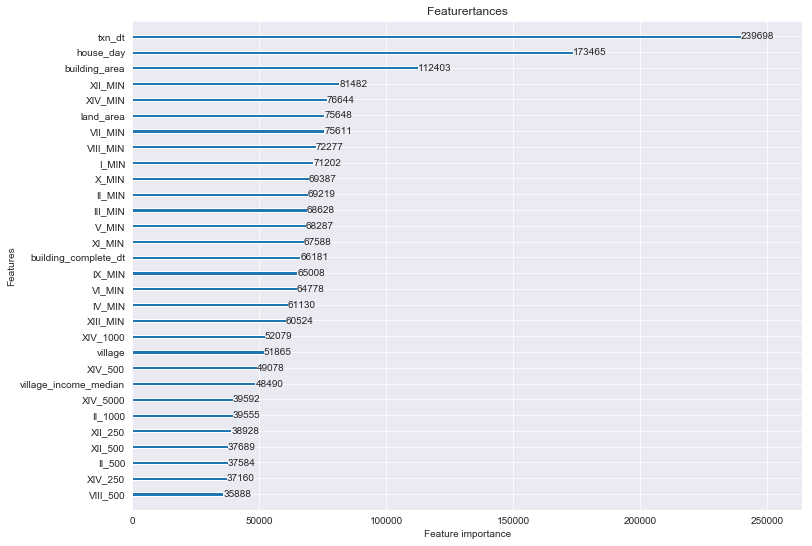

In [62]:
lgb.plot_importance(model_lgb, max_num_features=30,figsize=(12,9))

plt.title("Featurertances")
plt.show()

In [63]:
lgb_pred = np.expm1(model_lgb.predict(test.values))*test['building_area'].reset_index(drop=True)

In [64]:
test_ID = np.array(pd.read_csv('test_data.csv',usecols=['building_id']).reset_index(drop=True))
test_ID = np.array(test_ID).reshape(-1,)

In [65]:
ensemble =  lgb_pred
sub = pd.DataFrame()
sub['building_id'] = test_ID
sub['total_price'] = ensemble
sub.to_csv('submission.csv',index=False)

以下的model 參數為先前較好的幾組，後續作為ensemble之用

In [66]:
# 0.018589503633287884
# 5747.874479407
model_lgb_best = lgb.LGBMRegressor(objective='regression',num_leaves=150,
                              learning_rate=0.05, n_estimators=5720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [67]:
# 0.015793810064758565
# 5747.874479407
model_lgb2 = lgb.LGBMRegressor(objective='regression',num_leaves=150,
                              learning_rate=0.05, n_estimators=5720,
                              max_bin = 500, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [68]:
# 0.19609164283075534
# 5976.874158649251
model_lgb3 = lgb.LGBMRegressor(boosting_type='gbdt',objective='regression',num_leaves=300,
                              learning_rate=0.01, n_estimators=6000,
                              max_bin = 500, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.7,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 10,reg_lambda=0.1)

In [69]:
# 0.1 new
# 0.1984796669009298
# 5986.873315708198

model_lgb4 = lgb.LGBMRegressor(boosting_type='gbdt',objective='regression',num_leaves=500,
                              learning_rate=0.01, n_estimators=3800,
                              max_bin = 500, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.7,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 10,reg_lambda=0.1)

將先前存的幾版model重新訓練過，後續要跑出ensemble參數之用

In [71]:
# unit_price 0.1
model_lgb_best.fit(X_train, train_y)
lgb_best_valid_pred = model_lgb_best.predict(X_valid)
lgb_best_pred = np.expm1(model_lgb_best.predict(test.values))
print(rmsle(valid_y, lgb_best_valid_pred))
print(Score(valid_y, lgb_best_valid_pred))

0.18948580856545694
5985.8755483268515


In [ ]:
# joblib.dump(model_lgb_best, 'model/seed49/model_lgb_best.pkl') 
# model_lgb_best = joblib.load('model/seed49/model_lgb_best.pkl')

In [72]:
# unit_price 0.1
model_lgb2.fit(X_train, train_y)
lgb2_valid_pred = model_lgb2.predict(X_valid)
lgb2_pred = np.expm1(model_lgb2.predict(test.values))
print(rmsle(valid_y, lgb2_valid_pred))
print(Score(valid_y, lgb2_valid_pred))

0.1876820132162181
5962.876173351933


In [ ]:
# joblib.dump(model_lgb2, 'model/seed49/model_lgb2.pkl') 
# model_lgb2 = joblib.load('model/seed49/model_lgb2.pkl')

In [73]:
# unit_price 0.1
model_lgb3.fit(X_train, train_y)
lgb3_valid_pred = model_lgb3.predict(X_valid)
lgb3_pred = np.expm1(model_lgb3.predict(test.values))
print(rmsle(valid_y, lgb3_valid_pred))
print(Score(valid_y, lgb3_valid_pred))

0.18642178412329408
5938.877429070764


In [ ]:
# joblib.dump(model_lgb3, 'model/seed49/model_lgb3.pkl') 
# model_lgb3 = joblib.load('model/seed49/model_lgb3.pkl')

In [74]:
# unit_price 0.1
model_lgb4.fit(X_train, train_y)
lgb4_valid_pred = model_lgb4.predict(X_valid)
lgb4_pred = np.expm1(model_lgb4.predict(test.values))
print(rmsle(valid_y, lgb4_valid_pred))
print(Score(valid_y, lgb4_valid_pred))

0.18859613272780676
5927.87633020683


In [ ]:
# joblib.dump(model_lgb4, 'model/seed49/model_lgb4.pkl') 
# model_lgb4 = joblib.load('model/seed49/model_lgb4.pkl')

各model ensemble的結果如下

In [75]:
def ensemble(lgb_valid_pred,lgb3_valid_pred,lgb4_valid_pred):
    best_score=0
    best_score_id_X=0
    best_score_id_Y=0
    n=1000
    ensemble_valid=zeros = np.zeros( (n, n) )
    for i in range(n+1):
        for j in range(n-i):
            ensemble_valid[i,j] = (Score(valid_y,
        #             stacked_train_pred*1 
                    + lgb_valid_pred*i/n\
                    + lgb3_valid_pred*(j)/n
                    + lgb4_valid_pred*(n-i-j)/n  
    #               ,  X_valid['building_type_3']
                                             )
                                       )
            if ensemble_valid[i,j]>best_score:
                best_score=ensemble_valid[i,j]
                best_score_id_X=i
                best_score_id_Y=j
    return best_score,best_score_id_X,best_score_id_Y

In [76]:
best_score_id_X=744
best_score_id_Y=168
n=1000

In [77]:
# unit_price lgb49 Score gbm ,lgb4, lgb2
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb4_valid_pred,lgb2_valid_pred)

print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb4_valid_pred*(best_score_id_Y/n)+ lgb2_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

6093.8794858637175
636
136
1797.2413713550918
1698.230137458364
302.0423659902046
1078.1530570310676
1218.2125540289903
0.4722222222222222


In [78]:
# unit_price lgb49 Score lgb5 ,lgb_best, lgb2
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb_best_valid_pred,lgb2_valid_pred)

print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb_best_valid_pred*(best_score_id_Y/n)+ lgb2_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

6125.879667999037
726
155
1805.2413844774287
1703.2301680676867
303.04237497474065
1077.153097481572
1237.2126429976092
0.479328165374677


In [79]:
# unit_price lgb49 Score lgb5 ,lgb3, lgb4
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb3_valid_pred,lgb4_valid_pred)

print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb3_valid_pred*(best_score_id_Y/n)+ lgb4_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

6080.879277924153
877
20
1802.2413537743523
1687.230067331471
302.04235689344006
1070.1530847302313
1220.2124151946582
0.4728682170542636


In [80]:
# unit_price lgb49 Score lgb5 ,lgb_best, lgb4
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb_best_valid_pred,lgb4_valid_pred)
print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb_best_valid_pred*(best_score_id_Y/n)+ lgb4_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

6118.879502192043
778
173
1810.2413776819162
1695.2301289012212
302.042365263223
1082.1530969785877
1230.2125333670958
0.47674418604651164


In [81]:
# unit_price lgb49 Score lgb5 ,lgb2, lgb3
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb2_valid_pred,lgb3_valid_pred)
print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb2_valid_pred*(best_score_id_Y/n)+ lgb3_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

6090.879113592229
410
502
1790.241199116334
1700.2300572195304
300.0423484343659
1067.152941952228
1233.2125668697713
0.4780361757105943


In [82]:
# unit_price lgb49 gbm Score lgb5 ,lgb_best, lgb3
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb_best_valid_pred,lgb3_valid_pred)
print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb_best_valid_pred*(best_score_id_Y/n)+ lgb3_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

6112.879523292197
750
170
1800.2413720607672
1693.2301190653384
302.0423623250894
1087.153099745887
1230.212570095115
0.47674418604651164


In [83]:
# 改成以MAPE為主的score2
def ensemble(lgb_valid_pred,lgb3_valid_pred,lgb4_valid_pred):
    best_score=0
    best_score_id_X=0
    best_score_id_Y=0
    n=1000
    ensemble_valid=zeros = np.zeros( (n, n) )
    for i in range(n+1):
        for j in range(n-i):
            ensemble_valid[i,j] = (Score2(valid_y,
        #             stacked_train_pred*1 
                    + lgb_valid_pred*i/n\
                    + lgb3_valid_pred*(j)/n
                    + lgb4_valid_pred*(n-i-j)/n  
    #               ,  X_valid['building_type_3']
                                             )
                                       )
            if ensemble_valid[i,j]>best_score:
                best_score=ensemble_valid[i,j]
                best_score_id_X=i
                best_score_id_Y=j
    return best_score,best_score_id_X,best_score_id_Y

In [84]:
# unit_price lgb49 Score2 gbm ,lgb4, lgb2
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb4_valid_pred,lgb2_valid_pred)

print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb4_valid_pred*(best_score_id_Y/n)+ lgb2_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

8797.608666666667
778
13
1795.241381852671
1693.230158256398
302.04237098790446
1077.153087401285
1220.2126608072165
0.4728682170542636


In [85]:
# unit_price lgb49 Score2 lgb5 ,lgb_best, lgb2
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb_best_valid_pred,lgb2_valid_pred)

print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb_best_valid_pred*(best_score_id_Y/n)+ lgb2_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

8797.6125
724
156
1803.2413841955956
1703.2301681996146
303.04237494308967
1077.1530971577856
1238.212642917199
0.47997416020671835


In [86]:
# unit_price lgb49 Score2 lgb5 ,lgb3, lgb4
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb3_valid_pred,lgb4_valid_pred)

print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb3_valid_pred*(best_score_id_Y/n)+ lgb4_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

8794.606833333333
966
7
1802.2413504278854
1682.230076086177
300.0423618849531
1077.153093691165
1208.2124683674754
0.46834625322997414


In [87]:
# unit_price lgb49 Score2 lgb5 ,lgb_best, lgb4
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb_best_valid_pred,lgb4_valid_pred)
print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb_best_valid_pred*(best_score_id_Y/n)+ lgb4_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

8795.611833333332
775
172
1812.2413779291517
1695.2301286026393
302.04236513330113
1082.1530965768147
1228.2125307328738
0.4760981912144703


In [88]:
# unit_price lgb49 Score2 lgb5 ,lgb2, lgb3
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb2_valid_pred,lgb3_valid_pred)
print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb2_valid_pred*(best_score_id_Y/n)+ lgb3_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

8797.608666666667
782
208
1795.2413814686965
1692.2301574133771
302.0423709141846
1077.1530889239527
1222.212670587968
0.47351421188630494


In [89]:
# unit_price lgb49 gbm Score2 lgb5 ,lgb_best, lgb3
best_score,best_score_id_X,best_score_id_Y = ensemble(lgb_valid_pred, lgb_best_valid_pred,lgb3_valid_pred)
print(best_score)
print(best_score_id_X)
print(best_score_id_Y)
all_pred = lgb_valid_pred*best_score_id_X/n + lgb_best_valid_pred*(best_score_id_Y/n)+ lgb3_valid_pred*(n-best_score_id_X-best_score_id_Y)/n   
print(Score_type(valid_y, all_pred, X_valid['building_type_0']))
print(Score_type(valid_y, all_pred, X_valid['building_type_1']))
print(Score_type(valid_y, all_pred, X_valid['building_type_2']))
print(Score_type(valid_y, all_pred, X_valid['building_type_3']))
print(Score_type(valid_y, all_pred, X_valid['building_type_4']))
print(Score_acc(valid_y, all_pred, X_valid['building_type_4']))

8795.611166666667
744
168
1800.2413718793055
1693.230117631025
302.04236184570453
1087.1530993915092
1230.2125697212953
0.47674418604651164


In [90]:
lgb_pred = np.expm1(model_lgb.predict(test.values))#*test['building_area'].reset_index(drop=True)

In [91]:
ensemble =  lgb_pred*best_score_id_X/n+ lgb_best_pred*best_score_id_Y/n+lgb3_pred*(n-best_score_id_X-best_score_id_Y)/n 

In [92]:
ensemble *= test['building_area'].reset_index(drop=True)

In [93]:
sub = pd.DataFrame()
sub['building_id'] = test_ID
sub['total_price'] = ensemble
sub.to_csv('submission.csv',index=False)

將先前的model用全部的data重新訓練過，再用上面找到的ensemble比例做結合

In [ ]:
model_lgb_best.fit(train, y_train)
lgb_best_pred = np.expm1(model_lgb_best.predict(test.values))
model_lgb2.fit(train, y_train)
lgb2_pred = np.expm1(model_lgb2.predict(test.values))
model_lgb3.fit(train, y_train)
lgb3_pred = np.expm1(model_lgb3.predict(test.values))
model_lgb4.fit(train, y_train)
lgb4_pred = np.expm1(model_lgb4.predict(test.values))

In [ ]:
model_lgb5 = lgb.LGBMRegressor(bagging_fraction=0.74, bagging_freq=6, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.55, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.01, max_bin=300,
       max_depth=-1, metric='mape', min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=0, min_split_gain=0.0,
       min_sum_hessian_in_leaf=5, n_estimators=13936, n_jobs=-1,
       num_leaves=300, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.07, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model_lgb5.fit(train, y_train)
lgb5_pred = np.expm1(model_lgb5.predict(test.values))

In [ ]:
ensemble =  lgb5_pred*best_score_id_X/n+ lgb_best_pred*best_score_id_Y/n+lgb3_pred*(n-best_score_id_X-best_score_id_Y)/n 

In [ ]:
ensemble *= test['building_area'].reset_index(drop=True)

In [ ]:
sub = pd.DataFrame()
sub['building_id'] = test_ID
sub['total_price'] = ensemble
sub.to_csv('submission.csv',index=False)